# BCI-IL WS 2018/2019 - Exercise Sheet #02

#### Sample solution

In [23]:
% matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import bci_minitoolbox as bci

## Preparation: Loading Data

In [24]:
fname = 'erp_hexVPsag.npz'
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)

## Exercise 1: Scatter Plot of 2D Features  (8 points)

Make a scatter plot of the two distributions - *targets* and *nontargets*, one dot for each trial. On the `x`-axis, plot the value of channel Cz at `t` = 380 ms, and at the `y`-axis the value of PO3 at `t` = 300 ms. *(You may refer to the results of sheet 01 for the reason of this choice.)*
Draw for both distributions the two principal axes, with the lengths of the axes being the standard deviation of the data in that direction. 
Draw also the corresponding ellipses. **Hint:** You can get that with a transformation of the unit circle as on the slide *Illustration of Multiplication ...*.

No handles with labels found to put in legend.


(2, 1200)
(2, 218)
(2, 1200)
(2, 982)


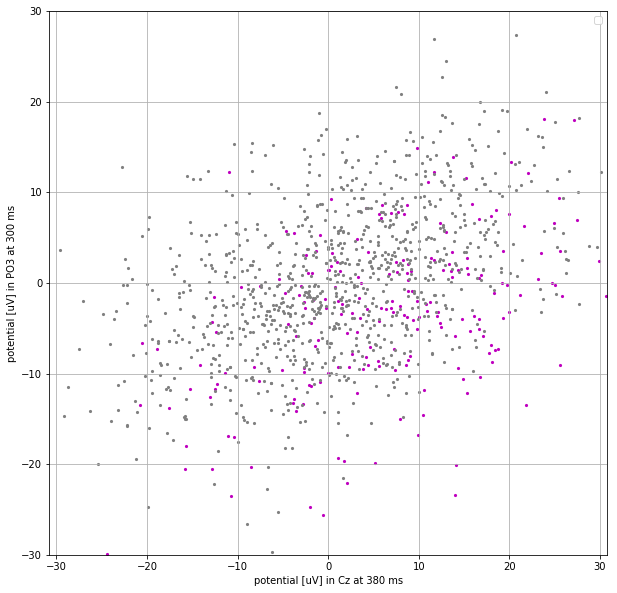

In [65]:
channels = ['Cz','PO3']
time_points = [380, 300]
reference_interval = [-100, 0]
interval = [reference_interval[0], max(time_points)] # 380

epo, epo_t = bci.makeepochs(cnt, fs, mrk_pos, interval)
epo = bci.baseline(epo, epo_t, reference_interval)


c0 = clab.index(channels[0]) # 22
c1 = clab.index(channels[1]) # 48
t0 = np.argmin(np.abs(epo_t - time_points[0])) # index of 380ms = 48
t1 = np.argmin(np.abs(epo_t - time_points[1])) # index of 300ms = 40
fv = epo[[t0, t1], [c0, c1], :] # 2,1200 values in range
# gets all epochs for time range 380-300ms for 2 chans all 1200 measurements

hf = plt.figure(figsize=(10,10))
col = ['m','0.5'] # ???
for ci in range(len(mrk_className)):
    print(fv.shape)
    X = fv[:, mrk_class==ci ]
    print(X.shape)
    plt.scatter(X[0, :], X[1, :], s=10, c=col[ci], linewidths=0)
    mu = np.mean(X, axis=1, keepdims=True)# mean of axis
    cov_matrix = np.cov(X) # cov matrix 2,2
    eigenvalue, eigenvectors = np.linalg.eigh(cov_matrix) # eigenvalue = 2;vector = 2,2
    
    # draw the axes corresponding to the two Eigenvectors
    axisOne = np.append(mu, mu + eigenvectors[:, [0]] * np.sqrt(eigenvalue[0]), axis=1) #2,2
    #plt.plot(axisOne[0, :], axisOne[1, :], '-', c=col[ci], linewidth=4, label=mrk_className[ci])
    axisTwo = np.append(mu, mu + eigenvectors[:, [1]] * np.sqrt(eigenvalue[1]), axis=1)
    #plt.plot(axisTwo[0, :], axisTwo[1, :], '-', c=col[ci], linewidth=4)
    
    # draw ellipse
    tline = np.linspace(0, 2 * np.pi, 100)
    sphere = np.vstack((np.sin([tline]), np.cos([tline])))
    ellipse = sp.linalg.sqrtm(cov_matrix).dot(sphere)
    #plt.plot(mu[0] + ellipse[0, :], mu[1] + ellipse[1, :], c=col[ci], linewidth=4)

plt.grid(True)
plt.axis('equal')
plt.xlim((-30,30))
plt.ylim((-30,30))
plt.xlabel('potential [uV] in {} at {} ms'.format(channels[0], time_points[0])) 
plt.ylabel('potential [uV] in {} at {} ms'.format(channels[1], time_points[1])) 
plt.legend()

## Exercise 2: Covariances and Eigenvalues  (7 points)

Calculate the channelwise covariance matrices (channel `x` channel) of the data for time point 380 ms for both classes (`np.cov`) and visualize them (`pl.imshow`). 
Perform an Eigenvalue decomposition (`np.linalg.eigh`) of the covariance matrices and plot (again class-wise) the eigenvalue spectrum. Then determine the four principle components (Eigenvectors) for each class that correspond to the largest Eigenvalues and display them as scalp maps (function `scalpmap` provided in the `bci_minitoolbox`).

[[ 6.49004404  8.81008315  1.88029313 ... -7.14208118 10.17481204
  27.61301449]
 [-1.20332852  7.95110745 -4.26496185 ... -8.33190761 -0.60928026
  29.97658899]
 [ 4.33379117 10.70522451 -7.04050987 ... -9.06294575 -3.93842777
  31.12726502]
 ...
 [ 2.12706395 17.10440681  3.30485969 ... -1.67000889  2.35559148
   4.34202311]
 [ 3.25292939 17.19666602 -0.38377257 ...  1.40716608 -3.19810473
   1.91886284]
 [ 7.48563673 13.08838325 -0.81132668 ... -0.24492881 -1.94412242
  -1.85227412]]
[[ 9.20433816 20.31929677 13.7382708  ... -9.29532009  7.71830004
   2.59298489]
 [ 4.53913797 18.33933595 17.7605197  ... -7.96633945  7.99680347
   8.86502784]
 [ 9.4126903  23.47850376 21.82101871 ... -2.95001925 14.78050884
  10.06656055]
 ...
 [ 8.19183306  4.65844584  1.74032505 ... -3.62128243  5.27371227
   8.31488635]
 [ 2.17471122  0.43859722  0.73099537 ... -5.55556479 -2.63158332
   5.02559315]
 [ 8.31227147 -0.44393347  1.2399521  ...  0.55108982 -4.25563806
   0.90317498]]


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


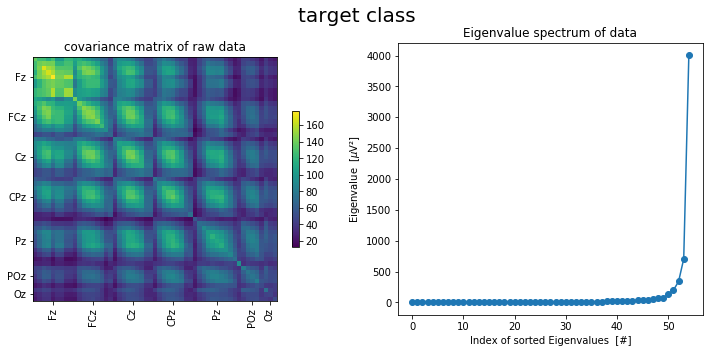

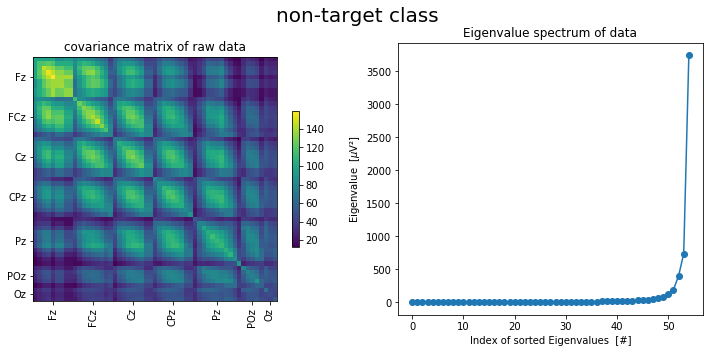

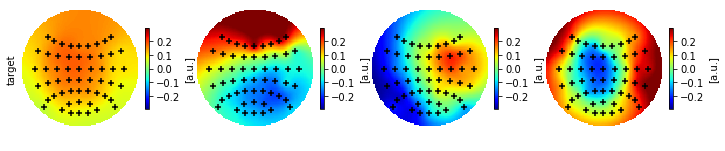

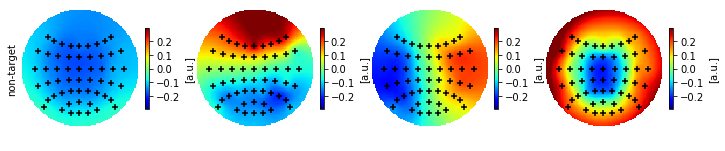

In [22]:
time_point = 380

# tick marks for the covariance plot
selected_channels = ['Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']
index_of_channels = [clab.index(x) for x in selected_channels]
# get the index of 380ms
t0 = np.argmin(np.abs(epo_t - time_point))
# get the measured values for 380s
fv = epo[t0, :, :]

# np zeros for 55 4 2 
EVs=np.zeros((epo.shape[1],4,2))
# for target and non-target 
for ci in range(len(mrk_className)):
    print(fv[:,mrk_class==ci])
    Cf= np.cov(fv[:,mrk_class==ci])
    df, Vf= np.linalg.eigh(Cf)    
    plt.figure(figsize=(12, 5))
    plt.suptitle(mrk_className[ci]+' class', fontsize=20)
    plt.subplot(1, 2, 1)
    plt.imshow(Cf)
    plt.title('covariance matrix of raw data')
    plt.colorbar(shrink=.5)
    plt.xticks(index_of_channels, selected_channels, rotation='vertical')
    plt.yticks(index_of_channels, selected_channels)
    
    plt.subplot(1, 2, 2)
    plt.plot(df, '-o' )
    plt.title('Eigenvalue spectrum of data')
    plt.xlabel('Index of sorted Eigenvalues  [#]')
    plt.ylabel('Eigenvalue  [$\mu$V²]')
    EVs[:,:,ci]=Vf[:,-4:]
    
maxamp = abs(EVs).max()    
    
for ci in range(len(mrk_className)):
    plt.figure(figsize=(12, 3))
    for k in range(4):
        plt.subplot(1, 4, k+1)
        bci.scalpmap(mnt, EVs[:,-1-k,ci], clim=(-maxamp,maxamp), cb_label='[a.u.]')
        if k==0:
            plt.ylabel(mrk_className[ci])
            plt.axis('on')
            plt.yticks([])
            plt.xticks([])
            plt.box('off')